# Workshop 7a -  Binary Classification using Logistic Regression

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
%matplotlib inline

# Linear Logistic Regression: AND function

In [2]:
# This is our AND function data 
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])

Y_train = np.array([
    0,
    0,
    0,
    1])

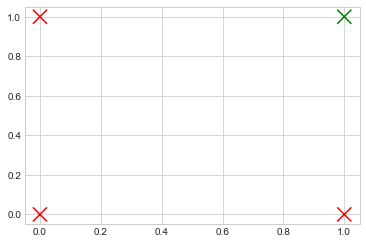

In [3]:
plt.style.use('seaborn-whitegrid')
# color map 'cmap' maps 0 labeled data points to red and 1 labeled points to green
cmap = matplotlib.colors.ListedColormap(["red", "green"], name='from_list', N=None)
# s-> size of marker
plt.scatter(X_train[:, 0], X_train[:, 1], s=200, c=np.squeeze(Y_train), marker='x', cmap=cmap)

In [4]:
X_train.shape

(4, 2)

In [5]:
Y_train.shape

(4,)

In [6]:
lr = LogisticRegression(C=1e5)
lr.fit(X_train, Y_train)

LogisticRegression(C=100000.0)

In [7]:
Y_pred_prob = lr.predict_proba(X_train)[:,1]
Y_pred_df = lr.decision_function(X_train)
Y_pred = lr.predict(X_train)
accuracy = accuracy_score(Y_train, Y_pred)

print("Target: {}".format(Y_train))
print("LR Probability: {}".format(Y_pred_prob))
print("LR Decision confidence: {}".format(Y_pred_df))
print("LR Prediction: {}".format(Y_pred))
print("LR Accuracy: {:.2%}".format(accuracy))

Target: [0 0 0 1]
LR Probability: [1.21910948e-11 1.82032615e-04 1.82032615e-04 9.99632357e-01]
LR Decision confidence: [-25.13031537  -8.61114263  -8.61114263   7.9080301 ]
LR Prediction: [0 0 0 1]
LR Accuracy: 100.00%


In [8]:
print ('LR Classification Report:\n\n', 
       classification_report(Y_train, Y_pred))

LR Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [9]:
def plot_cm(actual, pred):
    cm = confusion_matrix(actual, pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.title("Polynomial Logistic Regression Confusion Matrix")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label \n\n' + 
               "Accuracy: {:.2f}\n".format(accuracy_score(actual, pred)) + 
               "Precision: {:.2f}\n".format(precision_score(actual, pred, average='weighted')) + 
               "Recall: {:.2f}\n".format(recall_score(actual, pred, average='weighted')) +
               "F1: {:.2f}\n".format(f1_score(actual, pred, average='weighted')))

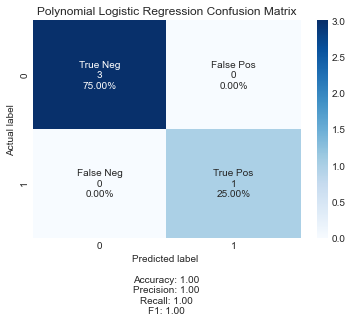

In [10]:
plot_cm(Y_train, Y_pred)

In [11]:
def plot_roc_auc(actual, pred, pred_proba):
    fpr, tpr, thresholds = roc_curve(actual, pred_proba)
    roc_auc = roc_auc_score(actual, pred)
    plt.figure()
    plt.style.use('seaborn-whitegrid')
    plt.plot(fpr, tpr, color='darkorange', lw=1.5, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

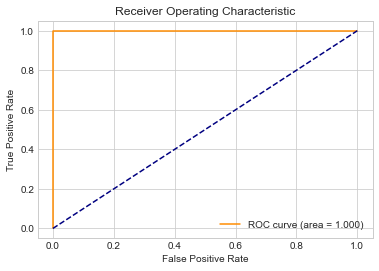

In [12]:
plot_roc_auc(Y_train, Y_pred, Y_pred_prob)

In [13]:
def plot_decision_boundary(model, poly_degree, X, Y, axis_lines=False, shade=False):
    # first plot the data to see what is the size of the plot
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y)) 

    # get the x and y range of the plot
    x_ticks = plt.xticks()[0]
    y_ticks = plt.yticks()[0]

    plt.clf()  # clear figure after getting size

    # Generate a grid of points between min_x_point-0.5 and max_x_point+0.5 
    # with 1000 points in between, similarly, for y points
    xs = np.linspace(min(x_ticks) - 0.5, max(x_ticks) + 0.5, 1000)
    ys = np.linspace(max(y_ticks) + 0.5, min(y_ticks) - 0.5, 1000)

    xx, yy = np.meshgrid(xs, ys)  # create data points

    # Predict the function value for the whole grid
    # np.c: Translates slice objects to concatenation along the second axis.
    prediction_data = np.c_[xx.ravel(), yy.ravel()]

    print("XX: {}, XX.ravel: {}".format (xx.shape, xx.ravel().shape))
    print("yy: {}, yy.ravel: {}".format (yy.shape, yy.ravel().shape))
    print("np.c concated shape{} as Predidction_data".format (prediction_data.shape))

    if poly_degree==0:
        Z = model(prediction_data)
    else:
        # Transform the prediction_data into polynomial=1, 2, or more
        poly = PolynomialFeatures(degree = poly_degree, interaction_only=False, include_bias=False)
        X_poly = poly.fit_transform(prediction_data)
        Z = model(X_poly)
        print("Polynomial degree: ", poly_degree)
    
    print("Prediction Output (Z): Before Reshape", Z.shape)
    Z = Z.reshape(xx.shape)
    print("Prediction Output (Z): After Reshape", Z.shape)

    plt.style.use('seaborn-whitegrid')

    # Plot the contour and training examples
    if shade:
        # 'contourf'-> filled contours (red('#EABDBD'): 0 / green('#C8EDD6'): 1)
        plt.contourf(xx, yy, Z, 
                     cmap=matplotlib.colors.ListedColormap(['#EABDBD', '#C8EDD6'],
                                                           name='from_list', N=None))
        plt.title('Shaded Decision Boundary', size=18)
    else:
        # draw a blue colored decision boundary
        plt.contour(xx, yy, Z, cmap='Blues')  
        plt.title('Decision Boundary', size=18)

    # Plot markers
    # color map 'cmap' maps 0 labeled data points to red and 1 labeled points to green
    cmap = matplotlib.colors.ListedColormap(["red", "green"], name='from_list', N=None)
    plt.scatter(X[:, 0], X[:, 1], s=200, c=np.squeeze(Y), marker='x', cmap=cmap)  

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    if axis_lines:
        plt.axhline(0, color='black')
        plt.axvline(0, color='black')
    plt.show()

XX: (1000, 1000), XX.ravel: (1000000,)
yy: (1000, 1000), yy.ravel: (1000000,)
np.c concated shape(1000000, 2) as Predidction_data
Polynomial degree:  1
Prediction Output (Z): Before Reshape (1000000,)
Prediction Output (Z): After Reshape (1000, 1000)


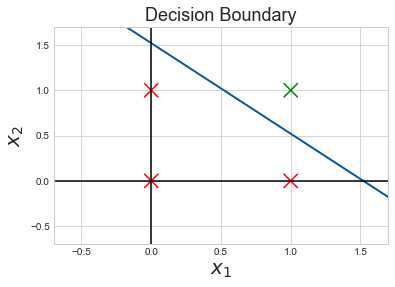

In [14]:
plot_decision_boundary(lr.predict, 1, X_train, Y_train, axis_lines=True, shade=False)

XX: (1000, 1000), XX.ravel: (1000000,)
yy: (1000, 1000), yy.ravel: (1000000,)
np.c concated shape(1000000, 2) as Predidction_data
Polynomial degree:  1
Prediction Output (Z): Before Reshape (1000000,)
Prediction Output (Z): After Reshape (1000, 1000)


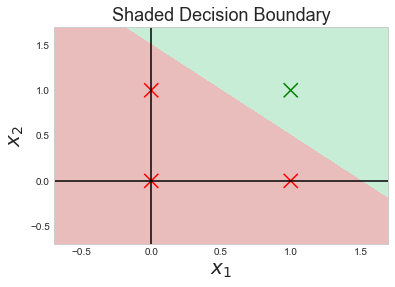

In [15]:
plot_decision_boundary(lr.predict, 1, X_train, Y_train, axis_lines=True, shade=True)

# Nonlinear Logistic Regression: XOR function

In [16]:
# This is our AND function data 
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]])

Y_train = np.array([
    0,
    1,
    1,
    0])

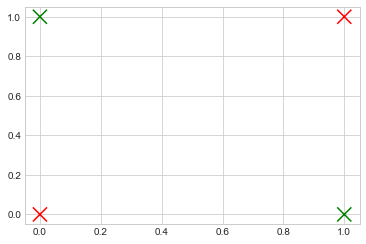

In [17]:
# color map 'cmap' maps 0 labeled data points to red and 1 labeled points to green
cmap = matplotlib.colors.ListedColormap(["red", "green"], name='from_list', N=None)
# s-> size of marker
plt.scatter(X_train[:, 0], X_train[:, 1], s=200, c=np.squeeze(Y_train), marker='x', cmap=cmap)

In [18]:
poly_degree = 5
poly = PolynomialFeatures(degree = poly_degree, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
print("Features transformed into Polynomial:\n", poly.get_feature_names())

Features transformed into Polynomial:
 ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5', 'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5']


C:\Users\jonat\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
pr = LogisticRegression(C=1e5)
pr.fit(X_poly, Y_train)

LogisticRegression(C=100000.0)

In [20]:
Y_pred_pr_prob = pr.predict_proba(X_poly)[:,1]
Y_pred_pr_df = pr.decision_function(X_poly)
Y_pred_pr = pr.predict(X_poly)
accuracy = accuracy_score(Y_train, Y_pred_pr)

print("Target: {}".format(Y_train))
print("PR Probability: {}".format(Y_pred_pr_prob))
print("PR Decision confidence: {}".format(Y_pred_pr_df))
print("PR Prediction: {}".format(Y_pred_pr))
print("PR Accuracy: {:.2%}".format(accuracy))

Target: [0 1 1 0]
PR Probability: [1.94658553e-04 9.99900031e-01 9.99900031e-01 2.02833794e-05]
PR Decision confidence: [ -8.54406887   9.21055135   9.21055135 -10.80568847]
PR Prediction: [0 1 1 0]
PR Accuracy: 100.00%


In [24]:
print ('PR Classification Report:\n\n', 
       classification_report(Y_train, Y_pred_pr))

PR Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



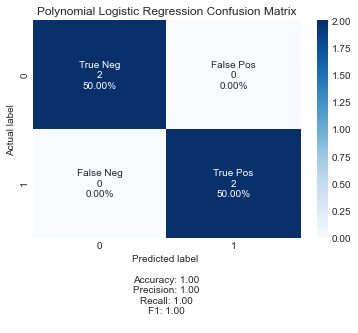

In [22]:
plot_cm(Y_train, Y_pred_pr)

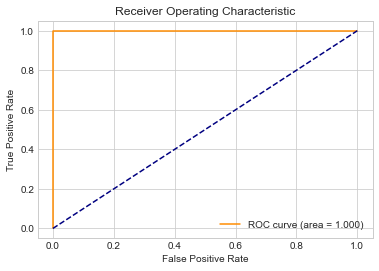

In [88]:
plot_roc_auc(Y_train, Y_pred_pr, Y_pred_pr_prob)

XX: (1000, 1000), XX.ravel: (1000000,)
yy: (1000, 1000), yy.ravel: (1000000,)
np.c concated shape(1000000, 2) as Predidction_data
Polynomial degree:  5
Prediction Output (Z): Before Reshape (1000000,)
Prediction Output (Z): After Reshape (1000, 1000)


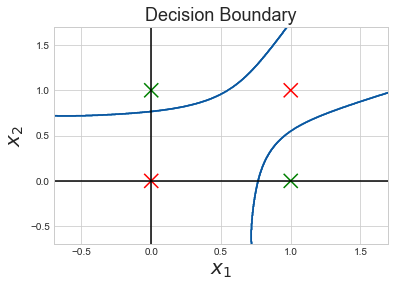

In [89]:
plot_decision_boundary(pr.predict, poly_degree, 
                       X_train, Y_train, axis_lines=True, shade=False)

XX: (1000, 1000), XX.ravel: (1000000,)
yy: (1000, 1000), yy.ravel: (1000000,)
np.c concated shape(1000000, 2) as Predidction_data
Polynomial degree:  5
Prediction Output (Z): Before Reshape (1000000,)
Prediction Output (Z): After Reshape (1000, 1000)


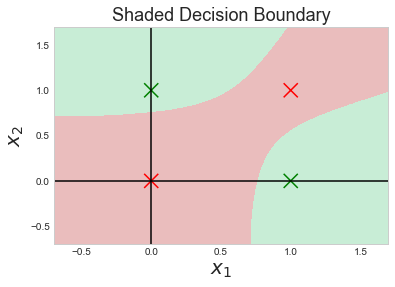

In [90]:
plot_decision_boundary(pr.predict, poly_degree, 
                       X_train, Y_train, axis_lines=True, shade=True)

# Nonlinear Logistic Regression: Complex function

In [114]:
class SampleData:
    def get_moon(self, n_samples, noise=0.05):
        noisy_moons = datasets.make_moons(
            n_samples=n_samples, noise=noise, random_state=6)
        return noisy_moons[0], noisy_moons[1]

    def get_donut(self, n_samples, noise=0.05, factor=0.5):
        noisy_circles = datasets.make_circles(
            n_samples=n_samples, factor=factor, noise=noise, random_state=6)
        return noisy_circles[0], noisy_circles[1]

    def plot(self, X, y):
        plt.style.use('seaborn-white')
        data = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
        data.plot.scatter(x='x', y='y', c=data['label'], figsize=(8.7,5),
                 cmap=matplotlib.colors.ListedColormap(
                     ['skyblue', 'salmon']), s=50, alpha=0.5);
        plt.show()

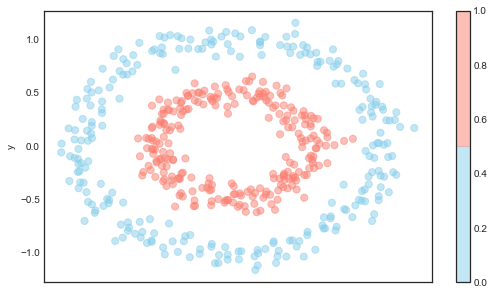

In [115]:
sample = SampleData()
X_train, Y_train = sample.get_donut(n_samples=500, noise=0.08)
sample.plot(X_train, Y_train)

In [116]:
X_train.shape

(500, 2)

In [123]:
Y_train.shape

(500,)

#### Investigating linear Logistic Regression with donut shape function

In [118]:
# Linear Logistic Regression
lr = LogisticRegression(C=1e5)
lr.fit(X_train, Y_train)

LogisticRegression(C=100000.0)

In [119]:
Y_pred_lr_prob = lr.predict_proba(X_train)[:,1]
Y_pred_lr_df = lr.decision_function(X_train)
Y_pred_lr = lr.predict(X_train)
accuracy = accuracy_score(Y_train, Y_pred_lr)

print("Target: {}".format(Y_train[:10]))
print("LR Probability: {}".format(Y_pred_lr_prob[:10]))
print("LR Probability: {}".format(Y_pred_lr_df[:10]))
print("LR Prediction: {}".format(Y_pred_lr[:10]))
print("LR Accuracy: {:.2%}".format(accuracy))

Target: [1 0 0 1 0 1 1 1 0 1]
LR Probability: [0.50276552 0.49937698 0.50295603 0.50341046 0.50614698 0.49931045
 0.49692488 0.50373007 0.50000644 0.49826327]
LR Probability: [ 1.10621757e-02 -2.49208744e-03  1.18242491e-02  1.36420393e-02
  2.45891540e-02 -2.75818323e-03 -1.23006325e-02  1.49205735e-02
  2.57625108e-05 -6.94694670e-03]
LR Prediction: [1 0 1 1 1 0 0 1 1 0]
LR Accuracy: 49.80%


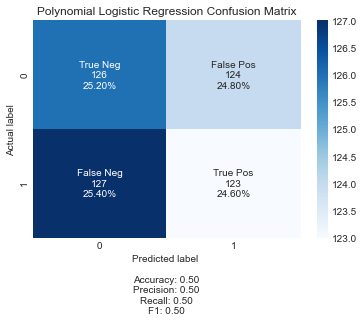

In [97]:
plot_cm(Y_train, Y_pred_lr)

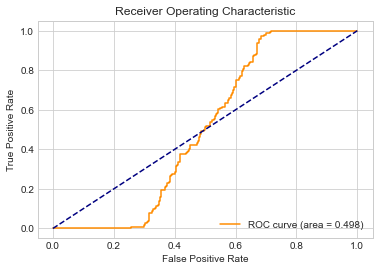

In [98]:
plot_roc_auc(Y_train, Y_pred_lr, Y_pred_lr_prob)

In [99]:
def plot_decision_boundary_range(model, poly_degree, X, y, shaded=False):
    # plot data
    plt.style.use('seaborn-white')
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, 
                cmap=matplotlib.colors.ListedColormap(
                    ['skyblue', 'salmon']), alpha=.5)
    ax = plt.gca()
    
    # create grid to evaluate model
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_span = np.linspace(xlim[0], xlim[1], 300)
    y_span = np.linspace(ylim[0], ylim[1], 300)
    xx, yy = np.meshgrid(x_span, y_span)
    
    prediction_data = np.c_[xx.ravel(), yy.ravel()]

    if poly_degree==0:
        z = model(prediction_data).reshape(xx.shape)
    else:
        poly = PolynomialFeatures(degree = poly_degree, 
                                  interaction_only=False, 
                                  include_bias=False)
        X_poly = poly.fit_transform(prediction_data)
        z = model(X_poly).reshape(xx.shape)
    
    # highlight boundary with colour  
    if shaded: ax.contourf(xx, yy, z, cmap="Paired", alpha=0.2)
        
    # draw a blue colored decision boundary    
    ax.contour(xx, yy, z, colors=['b', 'g', 'r'], 
               linestyles=['--', '-', '--'], 
               linewidths=[2.0, 2.0, 2.0], alpha=0.5) 
    plt.show()

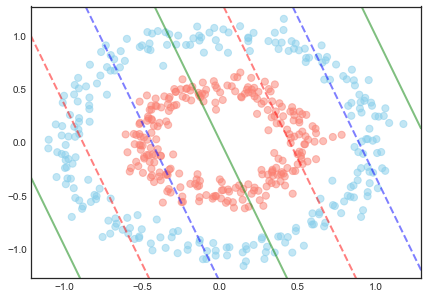

In [100]:
plot_decision_boundary_range(lr.decision_function, 0, 
                             X_train, Y_train, shaded=False)

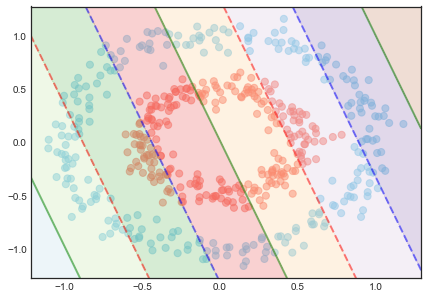

In [101]:
plot_decision_boundary_range(lr.decision_function, 0, 
                             X_train, Y_train, shaded=True)

#### Investigating nonlinear Logistic Regression with donut shape function

In [102]:
# Polynomial Logistic Regression
poly_degree = 2
poly = PolynomialFeatures(degree = poly_degree, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
print("Features transformed into Polynomial: ", poly.get_feature_names())
pr = LogisticRegression(C=1e5)
pr.fit(X_poly, Y_train)

Features transformed into Polynomial:  ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']


LogisticRegression(C=100000.0)

In [103]:
Y_pred_pr_prob = pr.predict_proba(X_poly)[:,1]
Y_pred_pr_df = pr.decision_function(X_poly)
Y_pred_pr = pr.predict(X_poly)
accuracy = accuracy_score(Y_train, Y_pred_pr)

print("Target: {}".format(Y_train[:10]))
print("LR Probability: {}".format(Y_pred_pr_prob[:10]))
print("PR Decision confidence: {}".format(Y_pred_pr_df[:10]))
print("LR Prediction: {}".format(Y_pred_pr[:10]))
print("LR Accuracy: {:.2%}".format(accuracy))

Target: [1 0 0 1 0 1 1 1 0 1]
LR Probability: [1.00000000e+00 3.10247321e-19 7.69494350e-13 1.00000000e+00
 2.71864252e-12 1.00000000e+00 1.00000000e+00 9.99999939e-01
 4.14650031e-28 1.00000000e+00]
PR Decision confidence: [ 26.50538576 -42.61691716 -27.89304278  21.64518379 -26.63088843
  36.50900336  26.23129371  16.61571388 -63.05011793  22.79391875]
LR Prediction: [1 0 0 1 0 1 1 1 0 1]
LR Accuracy: 100.00%


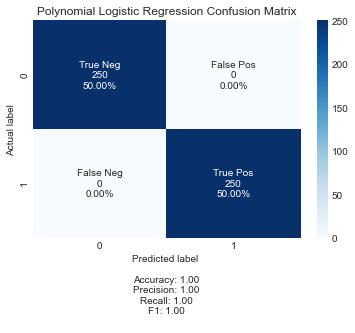

In [104]:
plot_cm(Y_train, Y_pred_pr)

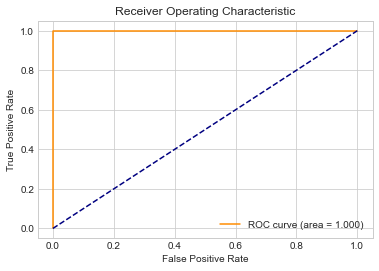

In [105]:
plot_roc_auc(Y_train, Y_pred_pr, Y_pred_pr_prob)

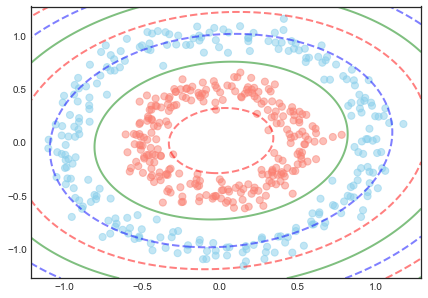

In [106]:
plot_decision_boundary_range(pr.decision_function, poly_degree, 
                             X_train, Y_train, shaded=False)

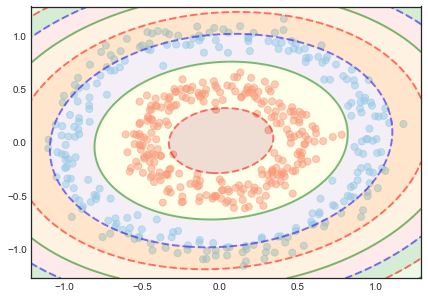

In [107]:
plot_decision_boundary_range(pr.decision_function, poly_degree, 
                             X_train, Y_train, shaded=True)

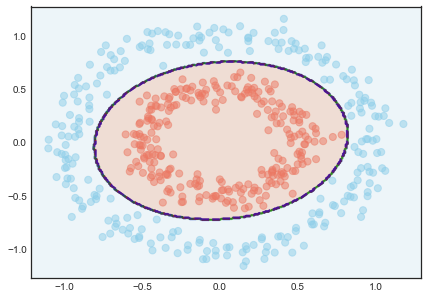

In [108]:
plot_decision_boundary_range(pr.predict, poly_degree, 
                             X_train, Y_train, shaded=True)

#### Investigating nonlinear Logistic Regression with moon shape data

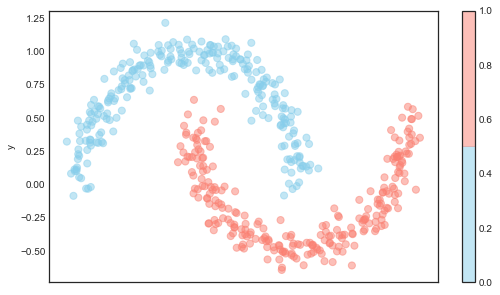

In [109]:
sample = SampleData()
X_train, Y_train = sample.get_moon(n_samples=500, noise=0.08)
sample.plot(X_train, Y_train)

In [110]:
poly_degree = 2
poly = PolynomialFeatures(degree = poly_degree, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
print("Features transformed into Polynomial: ", poly.get_feature_names())
# Polynomial Logistic Regression
pr = LogisticRegression(C=1e5)
pr.fit(X_poly, Y_train)
Y_pred_pr_prob = pr.predict_proba(X_poly)[:,1]
Y_pred_pr_df = pr.decision_function(X_poly)
Y_pred_pr = pr.predict(X_poly)
accuracy = accuracy_score(Y_train, Y_pred_pr)

print("Target: {}".format(Y_train[:10]))
print("LR Probability: {}".format(Y_pred_pr_prob[:10]))
print("PR Decision confidence: {}".format(Y_pred_pr_df[:10]))
print("LR Prediction: {}".format(Y_pred_pr[:10]))
print("LR Accuracy: {:.2%}".format(accuracy))

Features transformed into Polynomial:  ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']
Target: [1 0 0 1 0 1 1 1 0 1]
LR Probability: [0.23325677 0.01686748 0.08811531 0.60590806 0.69871244 0.97155608
 0.99336088 0.36066851 0.04265762 0.98667942]
PR Decision confidence: [-1.19001212 -4.06535647 -2.3368673   0.43014403  0.84117412  3.53096441
  5.00811479 -0.5724638  -3.11095515  4.30503476]
LR Prediction: [0 0 0 1 1 1 1 0 0 1]
LR Accuracy: 87.20%


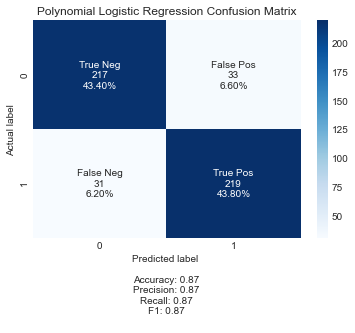

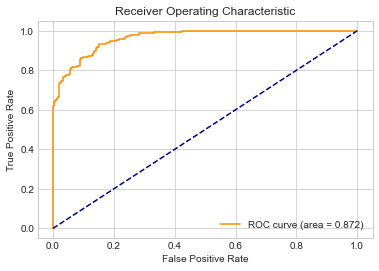

In [111]:
plot_cm(Y_train, Y_pred_pr)
plot_roc_auc(Y_train, Y_pred_pr, Y_pred_pr_prob)

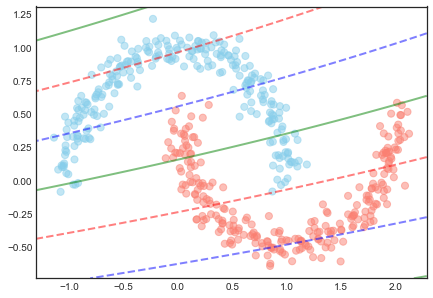

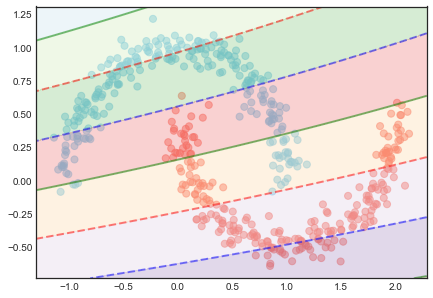

In [47]:
plot_decision_boundary_range(pr.decision_function, poly_degree, 
                             X_train, Y_train, shaded=False)
plot_decision_boundary_range(pr.decision_function, poly_degree, 
                             X_train, Y_train, shaded=True)

In [112]:
poly_degree = 5
poly = PolynomialFeatures(degree = poly_degree, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
print("Features transformed into Polynomial: ", poly.get_feature_names())
# Polynomial Logistic Regression
pr = LogisticRegression(C=1e5)
pr.fit(X_poly, Y_train)
Y_pred_pr_prob = pr.predict_proba(X_poly)[:,1]
Y_pred_pr_df = pr.decision_function(X_poly)
Y_pred_pr = pr.predict(X_poly)
accuracy = accuracy_score(Y_train, Y_pred_pr)

print("Target: {}".format(Y_train[:10]))
print("LR Probability: {}".format(Y_pred_pr_prob[:10]))
print("PR Decision confidence: {}".format(Y_pred_pr_df[:10]))
print("LR Prediction: {}".format(Y_pred_pr[:10]))
print("LR Accuracy: {:.2%}".format(accuracy))

Features transformed into Polynomial:  ['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5', 'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5']
Target: [1 0 0 1 0 1 1 1 0 1]
LR Probability: [9.99999986e-01 2.27588960e-15 3.18134628e-24 1.00000000e+00
 2.75932345e-16 1.00000000e+00 1.00000000e+00 9.99999976e-01
 4.19073835e-11 1.00000000e+00]
PR Decision confidence: [ 18.05121232 -33.71640539 -54.10473777 144.34758777 -35.82637597
 127.97111611  49.37767517  17.52606253 -23.89555909 107.21645777]
LR Prediction: [1 0 0 1 0 1 1 1 0 1]
LR Accuracy: 100.00%


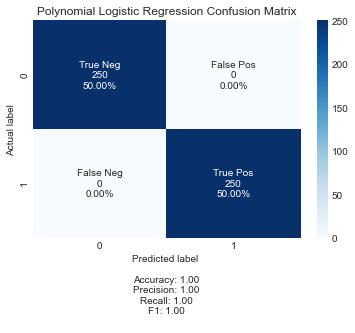

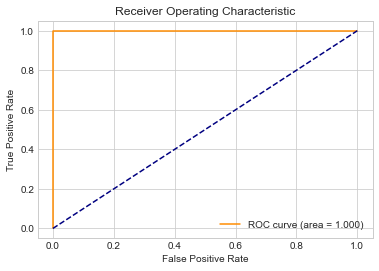

In [113]:
plot_cm(Y_train, Y_pred_pr)
plot_roc_auc(Y_train, Y_pred_pr, Y_pred_pr_prob)

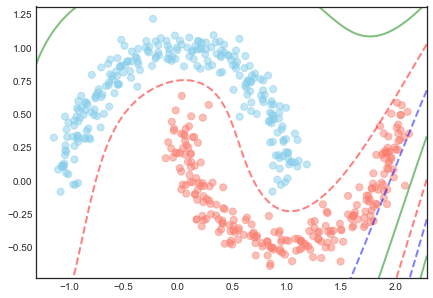

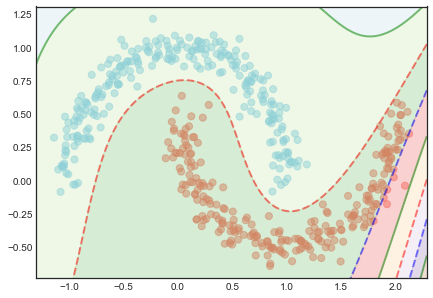

In [50]:
plot_decision_boundary_range(pr.decision_function, poly_degree, 
                             X_train, Y_train, shaded=False)
plot_decision_boundary_range(pr.decision_function, poly_degree, 
                             X_train, Y_train, shaded=True)

# End of Workshop 7